In [1]:
#Imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import math
from termcolor import colored
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

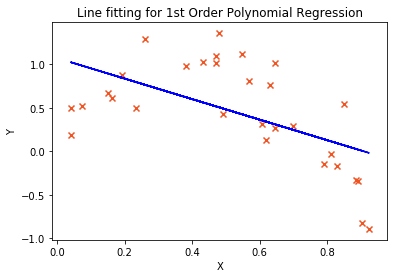

 Q.1-1 - 1st Order Polynomial Regression, Optimized Weights are -
 [[ 1.06902915 -1.17653632]]
 Q.1-1 - 1st Order Polynomial Regression, RMSE is - 0.3367611044189652


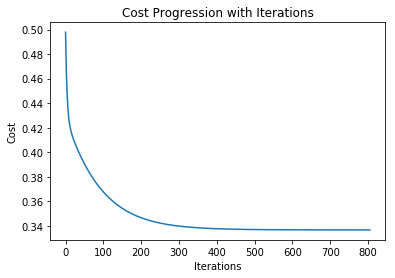

In [2]:
# Q.1-1 - 1st Order Polynomial Regression

# Reading data
data1 = pd.read_csv('ex2data1.csv', sep=",", encoding='utf-8', header='infer')
df = data1.copy()

def get_rmse(x, y, beta):
    m = len(x)
    inner = np.power(((x * beta.T) - y), 2)
    return math.sqrt(np.sum(inner) / (2 * m))

def drawPlot(Xcord, Ycord, y_pred, order, title, xlabel, ylabel):
    plt.scatter(Xcord, Ycord, c='#ef5423', marker='x')
    plt.ylabel(ylabel);
    plt.xlabel(xlabel);
    temp = 'Line' if order == 1 else 'Curve'
    order = '1st' if order == 1 else '2nd' if order ==2 else '3rd' if order == 3 else str(order)+'th'
    plt.title( temp + ' fitting for ' + order + ' Order Polynomial Regression' + title)
    plt.plot(Xcord, y_pred, c='blue')
    plt.show()
    
def plotCostHistory(cost_history):
     plt.plot(cost_history)
     plt.ylabel('Cost');
     plt.xlabel('Iterations');
     plt.title('Cost Progression with Iterations')
     plt.show()
    
def normalizeData(df, needSort, byColumn, yColumn):
    if(needSort):
        df = df.sort_values(by=[byColumn]) # sort values for plotting sane graph
    Y = df[[yColumn]]
    X = df.drop([yColumn], axis=1)
    #print('----Before norm-----')
    #print(X)
    X = (X-X.mean(axis=0))/X.std(axis=0)
    #print('----After norm-----')
    #print(X)
    X.insert(0,-1,1)# inserting ones column for beta0
    return X, Y

def gradientDescentUsingMatrix(x, y, beta, learning_rate, iters):  
    temp = np.matrix(np.zeros(beta.shape))
    parameters = int(beta.ravel().shape[1])
    cost = np.zeros(iters)
    old_cost = sys.maxsize
    new_cost = sys.maxsize
    cost_history = []
    for i in range(iters):
        error = (x * beta.T) - y
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = beta[0,j] - ((learning_rate / len(x)) * np.sum(term))
            
        beta = temp
        old_cost = new_cost
        new_cost = get_rmse(x, y, beta)
        if(abs(old_cost - new_cost) < 0.0000001):
            #print("breaking" + str(old_cost) + str(new_cost))
            break;
        #print ("cost : " + str(new_cost))
        cost[i] = str(new_cost)
        cost_history.append(new_cost)
    return beta, cost_history, new_cost

df.insert(0,-1,1)# inserting ones column for beta0
Y = df[['y']]
X = df.drop(['y'], axis=1)

X =  np.matrix(X.values)
Y =  np.matrix(Y.values)

beta = np.matrix(np.zeros(X.shape[1]))
beta, costs, rmse = gradientDescentUsingMatrix(X, Y, beta, 0.1, 100000)
y_pred = X * beta.T
drawPlot(df['x'], df['y'], y_pred, 1, '', 'X', 'Y');
print(" Q.1-1 - 1st Order Polynomial Regression, Optimized Weights are -\n", beta)
print(" Q.1-1 - 1st Order Polynomial Regression, " + colored('RMSE is - ' + str(rmse), 'green'))
plotCostHistory(costs)

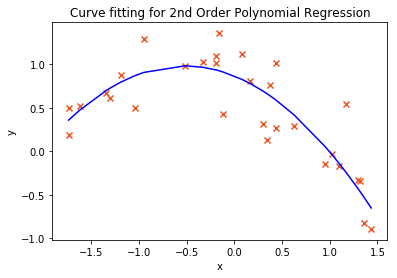

 Q.1-2 - 2nd Order Polynomial Regression, Optimized Weights are -
 [[ 0.45269151  1.15045635 -1.53187134]]
 Q.1-2 - 2nd Order Polynomial Regression, RMSE is - 0.20202301509602702


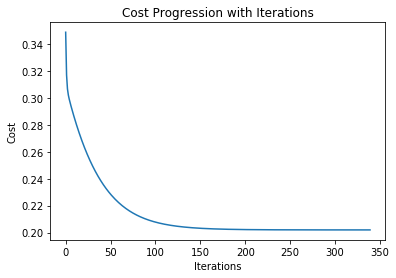

In [3]:
# Q.1-2 - 2nd Order Polynomial Regression

def generatePolynomialInput(df, order, xheader):
    for i in range(2,order+1):
        df[i] = df[xheader]**i
    return df

def performPolynomialRegression(df, learning_rate, iters, order, xheader, yheader, plt_title, draw):
    beta = np.matrix(np.zeros(order+1))
    #print(df.head())
    normalized_df_poly = generatePolynomialInput(df, order, xheader)
    #print(normalized_df_poly.head())
    X, Y = normalizeData(normalized_df_poly, True, xheader, yheader); # Normalize the data for proper scaling
    XM = np.matrix(X.values)
    YM = np.matrix(Y.values)
    Xcord = list(XM[:,1].flat)
    Ycord = list(YM[:,0].flat)
    beta, costs, rmse = gradientDescentUsingMatrix(XM, YM, beta, learning_rate, iters)
    y_pred = XM * beta.T
    if(draw):
        drawPlot(Xcord, Ycord, y_pred, order, plt_title, xheader, yheader);
    return beta, rmse, costs, X

df = data1;
beta, rmse, costs, X = performPolynomialRegression(df, 0.5, 10000, 2, 'x', 'y', '', True)
print(" Q.1-2 - 2nd Order Polynomial Regression, Optimized Weights are -\n",beta)
print(" Q.1-2 - 2nd Order Polynomial Regression, " + colored('RMSE is - ' + str(rmse), 'green'))
plotCostHistory(costs)

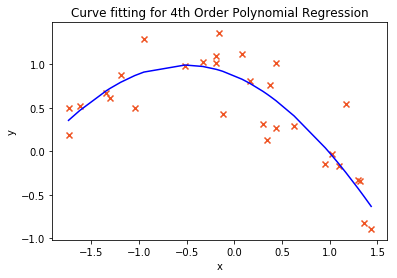

 Q.1-3 - 4th Order Polynomial Regression, Optimized Weights are -
 [[ 0.45269151  1.10039392 -1.17681667 -0.6637961   0.36229393]]
 Q.1-3 - 4th Order Polynomial Regression, RMSE is - 0.20207035442606053


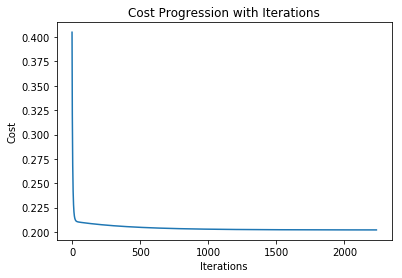

In [4]:
# Q.1-3 - 4th Order Polynomial Regression

# Normalize the data for proper scaling
df = data1;
beta, rmse, costs, X= performPolynomialRegression(df, 0.5, 10000, 4, 'x', 'y', '', True)
print(" Q.1-3 - 4th Order Polynomial Regression, Optimized Weights are -\n", beta)
print(" Q.1-3 - 4th Order Polynomial Regression, " + colored('RMSE is - ' + str(rmse), 'green'))
plotCostHistory(costs)

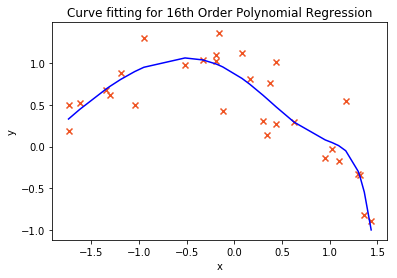

 Q.1-4 - 16th Order Polynomial Regression, Optimized Weights are -
 [[ 0.45269151  1.05509834 -0.59245275 -0.90636536 -0.66605292 -0.28806158
   0.05427814  0.30171812  0.44372399  0.48908118  0.45304357  0.35183622
   0.20044085  0.01185074 -0.20302971 -0.43522176 -0.67742135]]
 Q.1-4 - 16th Order Polynomial Regression, RMSE is - 0.18622226845119225


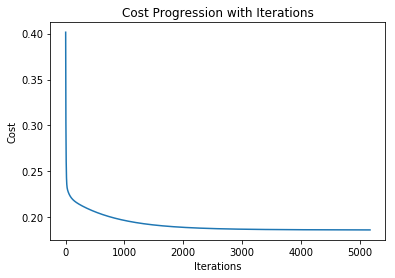

In [5]:
# Q.1-4 - 16th Order Polynomial Regression

df = data1;
beta, rmse, costs, X= performPolynomialRegression(df, 0.1, 10000, 16, 'x', 'y', '', True)
print(" Q.1-4 - 16th Order Polynomial Regression, Optimized Weights are -\n", beta)
print(" Q.1-4 - 16th Order Polynomial Regression, " + colored('RMSE is - ' + str(rmse), 'green'))
plotCostHistory(costs)

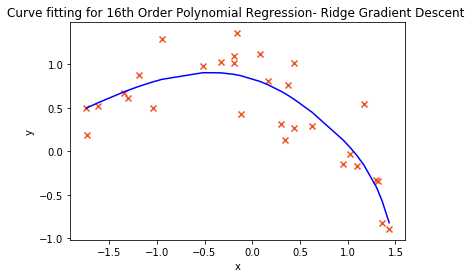

 Q.1-5 - 16th Order Ridge Polynomial Regression, Optimized Weights are -
 [[ 0.45118755  0.53544948 -0.25366544 -0.39991202 -0.31344868 -0.17349449
  -0.0462667   0.04756403  0.10507794  0.12988115  0.12751364  0.10359459
   0.06313313  0.01033896 -0.05135959 -0.1192208  -0.19107637]]
 
Q.1-5 - 16th Order Ridge Polynomial Regression, RMSE is - 0.20578065471208168


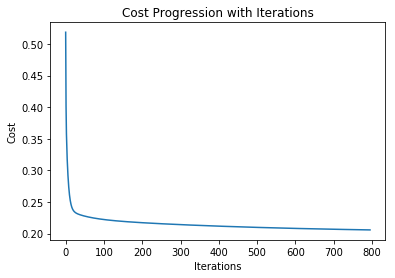

In [6]:
#Q.1-5 16th Order Ridge Polynomial Regression

def get_rmse_l2(x, y, beta, lamda):
    m = len(x)
    inner = np.power(((x * beta) - y), 2)
    sq_sum = np.sum(inner)
    cost = (1/(2*m)) * (sq_sum + (lamda * np.sum(np.power(beta,2))))
    return math.sqrt(cost)

def get_rmse_l1(x, y, beta, lamda):
    m = len(x)
    inner = np.power(((x * beta) - y), 2)
    sq_sum = np.sum(inner)
    cost = (1/(2*m)) * (sq_sum + np.sum(lamda * beta))
    return math.sqrt(cost)

def ridgeGradientDescent(X, Y, alpha, iters, lamda):
    x=np.matrix(X)
    y=np.matrix(Y)
    m, n = np.shape(X)
    beta = np.matrix(np.zeros(n)).transpose()
    XT = x.transpose()
    old_cost = sys.maxsize
    new_cost = sys.maxsize
    cost_history = []
    for i in range(0, iters):
        y_new = np.dot(X, beta)
        error = y_new - y
        old_cost = new_cost
        new_cost = get_rmse_l2(np.matrix(X), y, beta, lamda)
        if(abs(old_cost - new_cost) < 0.00001):
            #print("breaking" + str(old_cost) + str(new_cost))
            break;
        cost_history.append(new_cost)
        #print("iteration:", i, "RMSE:", str(new_cost))
        old_gradient = np.dot(XT, error) / m
        temp1 = (lamda/m)*beta
        temp = alpha * (old_gradient + temp1)
        beta = beta - temp
    return beta, new_cost, cost_history

def performRidgePolynomialRegression(df, learning_rate, iters, order, lamda, xheader, yheader, draw, title):
    beta = np.matrix(np.zeros(order+1))
    #print(df.head())
    normalized_df_poly = generatePolynomialInput(df, order, xheader)
    #print(normalized_df_poly.head())
    X, Y = normalizeData(normalized_df_poly, True,xheader, yheader); # Normalize the data for proper scaling
    XM = np.matrix(X.values)
    YM = np.matrix(Y.values)
    Xcord = list(XM[:,1].flat)
    Ycord = list(YM[:,0].flat)
    beta, rmse, costs = ridgeGradientDescent(X, Y, learning_rate, iters, lamda)
    y_pred = XM * beta
    if(draw):
        drawPlot(Xcord, Ycord, y_pred, order,'- Ridge Gradient Descent ' + title , xheader, yheader);
    return beta, rmse, costs, X

df = data1;
beta, rmse, costs, x = performRidgePolynomialRegression(df, 0.1, 10000, 16, 0.1, 'x', 'y', True, '')
print(" Q.1-5 - 16th Order Ridge Polynomial Regression, Optimized Weights are -\n", beta.ravel())
print(" \nQ.1-5 - 16th Order Ridge Polynomial Regression, " + colored('RMSE is - ' + str(rmse), 'green'))
plotCostHistory(costs)

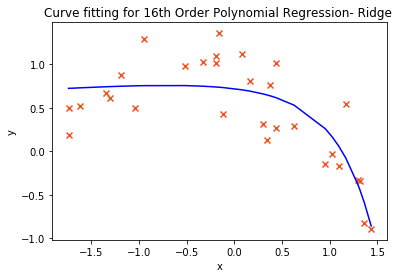

Q. 1-6. 16th Order Polynomial Regression SKlearn Ridge model, Optimized Weights are
[[ 0.          0.0545361  -0.02729518 -0.05646995 -0.06182051 -0.05785865
  -0.05092652 -0.04369792 -0.03722955 -0.03186236 -0.02762572 -0.02442212
  -0.02211184 -0.02055078 -0.01960609 -0.01916153 -0.01911805]]

Q.1-6 - 16th Order Polynomial Regression SKlearn Ridge model, RMSE is - 0.39998254742392325


In [7]:
# 1-6 16th Order Polynomial Regression scikit-learn Ridge model

df = data1;
def sklearn_ridge_polynomial_regression(df, order, xheader, yheader, needSort, lamda, draw, title):
    if(order != None):
        df = generatePolynomialInput(df, order, xheader)
    X, Y = normalizeData(df, needSort, xheader, yheader); # Normalize the data for proper scaling
    betas = []
    clf = Ridge(alpha=lamda, copy_X = True, fit_intercept = True, max_iter = None, normalize=False, 
      random_state=None, solver ='auto', tol=0.001)
    clf.fit(X,Y)
    beta = clf.coef_
    Ypred = clf.predict(X)
    XM = np.matrix(X.values)
    YM = np.matrix(Y.values)
    Xcord = list(XM[:,1].flat)
    Ycord = list(YM[:,0].flat)
    rmse = get_rmse_l2(np.matrix(X), np.matrix(Y), beta.T, lamda)
    if(draw):
        drawPlot(Xcord, Ycord, Ypred, 16, "- Ridge " + title, xheader, yheader)
    return X, Y, beta, rmse
X, Y, beta, rmse = sklearn_ridge_polynomial_regression(df, 16, 'x', 'y', True, 10, True, '')
print("Q. 1-6. 16th Order Polynomial Regression SKlearn Ridge model, Optimized Weights are\n" + str(beta))
print("\nQ.1-6 - 16th Order Polynomial Regression SKlearn Ridge model, " + colored('RMSE is - ' + str(rmse), 'green'))


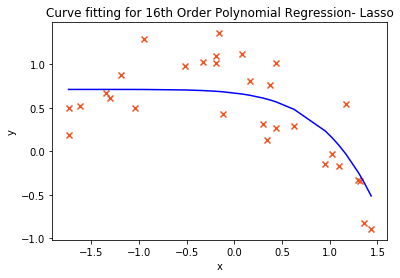

Q. 1-7. 16th Order Polynomial Regression SKlearn Lasso model, Optimized Weights are -
[[ 0.         -0.         -0.         -0.         -0.         -0.
  -0.37838915 -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.        ]]
 Q.1-7 - 16th Order Polynomial Regression SKlearn Lasso model, RMSE is - 0.4017515157735548


In [8]:
# 1-7 16th Order Polynomial Regression scikit-learn Lasso model

df = data1;
def sklearn_lasso_polynomial_regression(df, order, xheader, yheader, needSort, lamda, draw, title):
    if(order != None):
        df = generatePolynomialInput(df, order, xheader)
    X, Y = normalizeData(df, needSort, xheader, yheader); # Normalize the data for proper scaling
    betas = []
    clf = Lasso(alpha=lamda, copy_X = True, fit_intercept = True, max_iter = 1000000, normalize=False, 
      positive=False, precompute=False, random_state=None, selection = 'cyclic', tol=0.0001, warm_start=False)
    clf.fit(X,Y)
    beta = clf.coef_
    beta = np.asmatrix(beta)
    Ypred = clf.predict(X)
    XM = np.matrix(X.values)
    YM = np.matrix(Y.values)
    Xcord = list(XM[:,1].flat)
    Ycord = list(YM[:,0].flat)
    rmse = get_rmse_l1(np.matrix(X), np.matrix(Y), beta.T, lamda)
    if(draw):
        drawPlot(Xcord, Ycord, Ypred, 16, "- Lasso" + title, xheader, yheader)
    return X, Y, beta, rmse
X, Y, beta, rmse = sklearn_lasso_polynomial_regression(df, 16, 'x', 'y', True, 0.1, True, '')
print("Q. 1-7. 16th Order Polynomial Regression SKlearn Lasso model, Optimized Weights are -\n" + str(beta))
print(" Q.1-7 - 16th Order Polynomial Regression SKlearn Lasso model, " + colored('RMSE is - ' + str(rmse), 'green'))


In [9]:
# Reading data for Q.2
data2 = pd.read_csv('ex2data2.csv', sep=",", encoding='utf-8', header='infer')
df = data2
def split_data_test_train_val(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Split the data
X_train, X_val, X_test, y_train, y_val, y_test = split_data_test_train_val(df[['sqft_living']], df[['price']])

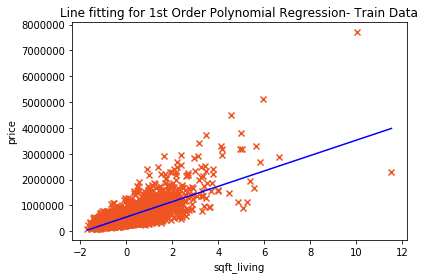

 Q.2-1 - 1st Order Polynomial Regression, Optimized Weights are -
 [[ 551410.18262527  297675.02276913]]
 Q.2-1 - 1st Order Polynomial Regression, Train RMSE is - 194323.42159017947
 Q.2-1 - 1st Order Polynomial Regression, Test RMSE is - 187347.68780783817


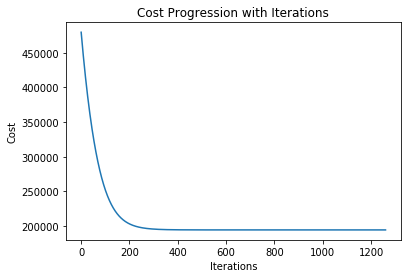

In [10]:
# Q.2-1 1st Order Polynomal Regression with Test, Train and Validation data
df = data2;
def perform_Polynomial_Regression_val(X_train, X_val, X_test, y_train, y_val, y_test, 
                                                 order, xheader, yheader):
    alpha = [0.1, 0.01, 0.001]
    scores = pd.DataFrame(columns=['alpha','rmse_diff'])
    i=0
    for a in alpha:
        betaTrain, rmseTrain, costsTrain, x = performPolynomialRegression(pd.concat([X_train, y_train], axis=1),
                                                            a, 10000, order, xheader, yheader,'', False)

        betaVal, rmseVal, costsVal, x = performPolynomialRegression(pd.concat([X_val, y_val], axis=1),
                                                            a, 10000, order, xheader, yheader,'', False)
        scores.loc[i] = pd.Series({'alpha':a, 'rmse_diff':abs(rmseTrain-rmseVal)})
        i=i+1
    #print(scores)
    least_rmse_comb = scores['rmse_diff'].idxmin()
    #print(scores.iloc[[least_rmse_comb]])
    alp = scores.iloc[[least_rmse_comb]]['alpha']
    #print(alp)
    betaTrain, rmseTrain, costsTrain, x = performPolynomialRegression(pd.concat([X_train, y_train], axis=1),
                                                                alp, 10000, order, xheader, yheader, '- Train Data', True)
    return betaTrain, rmseTrain, costsTrain, x



betaTrain, rmseTrain, costsTrain, Xtr = perform_Polynomial_Regression_val(X_train, X_val, X_test, y_train, y_val, y_test, 1, 
                                                 'sqft_living', 'price')
X_test, y_test = normalizeData(pd.concat([X_test, y_test], axis=1), False ,'', 'price')
rmseTest = get_rmse(np.matrix(X_test), np.matrix(y_test), betaTrain)
print(" Q.2-1 - 1st Order Polynomial Regression, Optimized Weights are -\n", betaTrain.ravel())
print(" Q.2-1 - 1st Order Polynomial Regression, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
print(" Q.2-1 - 1st Order Polynomial Regression, " + colored('Test RMSE is - ' + str(rmseTest), 'green'))
plotCostHistory(costsTrain)



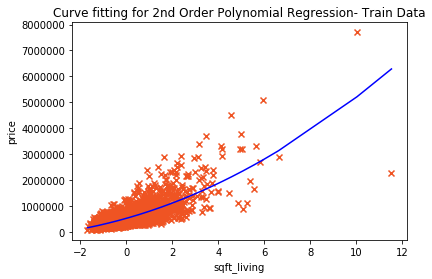

 Q.2-2 - 2nd Order Polynomial Regression, Optimized Weights are -
 [[ 551386.98388152  160224.34947393  151547.65150739]]
 Q.2-2 - 2nd Order Polynomial Regression, Train RMSE is - 189115.73263078745
 Q.2-2 - 2nd Order Polynomial Regression, Test RMSE is - 179509.85435143232


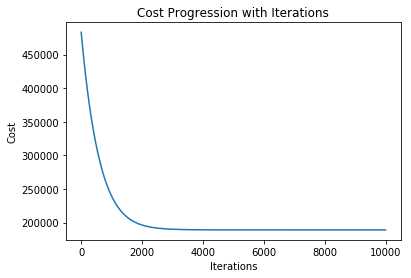

In [11]:
# Q.2-2 2nd Order Polynomal Regression with Test, Train and Validation data
X_train, X_val, X_test, y_train, y_val, y_test = split_data_test_train_val(df[['sqft_living']], df[['price']])
betaTrain, rmseTrain, costsTrain, Xtr = perform_Polynomial_Regression_val(X_train, X_val, X_test, y_train, y_val, y_test, 2, 
                                                 'sqft_living', 'price')
dfTest = pd.concat([X_test, y_test], axis=1)
dfTest = generatePolynomialInput(dfTest, 2, 'sqft_living')
X_test, y_test = normalizeData(dfTest, False ,'', 'price')
rmseTest = get_rmse(np.matrix(X_test), np.matrix(y_test), betaTrain)
print(" Q.2-2 - 2nd Order Polynomial Regression, Optimized Weights are -\n", betaTrain.ravel())
print(" Q.2-2 - 2nd Order Polynomial Regression, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
print(" Q.2-2 - 2nd Order Polynomial Regression, " + colored('Test RMSE is - ' + str(rmseTest), 'green'))
plotCostHistory(costsTrain)



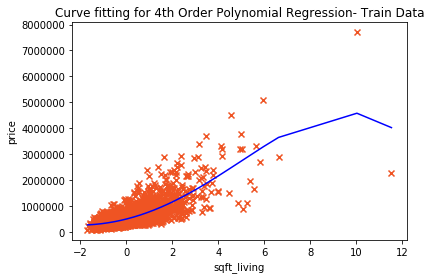

 Q.2-3 - 4th Order Polynomial Regression, Optimized Weights are -
 [[ 551411.89300173    3869.9547155   329731.32294129  162498.99473332
  -244347.8612713 ]]
 Q.2-3 - 4th Order Polynomial Regression, Train RMSE is - 183087.6146690434
 Q.2-3 - 4th Order Polynomial Regression, Test RMSE is - 185182.2221316985


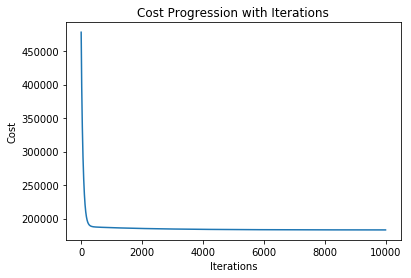

In [12]:
# Q.2-3 4th Order Polynomal Regression with Test, Train and Validation data
X_train, X_val, X_test, y_train, y_val, y_test = split_data_test_train_val(df[['sqft_living']], df[['price']])
betaTrain, rmseTrain, costsTrain, Xtr = perform_Polynomial_Regression_val(X_train, X_val, X_test, y_train, y_val, 
                                                                          y_test, 4, 'sqft_living', 'price')
dfTest = pd.concat([X_test, y_test], axis=1)
dfTest = generatePolynomialInput(dfTest, 4, 'sqft_living')
X_test, y_test = normalizeData(dfTest, False ,'', 'price')
rmseTest = get_rmse(np.matrix(X_test), np.matrix(y_test), betaTrain)
print(" Q.2-3 - 4th Order Polynomial Regression, Optimized Weights are -\n", betaTrain.ravel())
print(" Q.2-3 - 4th Order Polynomial Regression, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
print(" Q.2-3 - 4th Order Polynomial Regression, " + colored('Test RMSE is - ' + str(rmseTest), 'green'))
plotCostHistory(costsTrain)

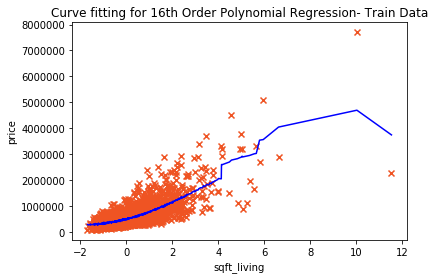

 Q.2-4 - 16th Order Polynomial Regression, Optimized Weights are -
 [[  5.51411893e+05  -8.02504385e+03   3.22983455e+05   2.57199480e+05
   -3.27034295e+05  -1.94674650e+04   6.97479994e+02   6.12035151e+01
    3.15017984e+03  -6.02400479e+03  -1.05453473e+04  -7.07843005e+02
    5.74717154e+03   7.11123484e+03  -3.49145042e+03  -4.39826593e+03
   -1.55085423e+02]]
 Q.2-4 - 16th Order Polynomial Regression, Train RMSE is - 182186.96772281028
 Q.2-4 - 16th Order Polynomial Regression, Test RMSE is - 187160.48006343946


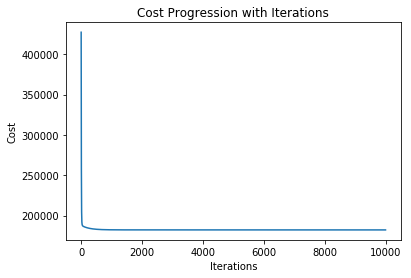

In [13]:
# Q.2-4 16th Order Polynomal Regression with Test, Train and Validation data
X_train, X_val, X_test, y_train, y_val, y_test = split_data_test_train_val(df[['sqft_living']], df[['price']])
betaTrain, rmseTrain, costsTrain, Xtr = perform_Polynomial_Regression_val(X_train, X_val, X_test, y_train, y_val, 
                                                                          y_test, 16, 'sqft_living', 'price')
dfTest = pd.concat([X_test, y_test], axis=1)
dfTest = generatePolynomialInput(dfTest, 16, 'sqft_living')
X_test, y_test = normalizeData(dfTest, False ,'', 'price')                                                                                
rmseTest = get_rmse(np.matrix(X_test), np.matrix(y_test), betaTrain)
print(" Q.2-4 - 16th Order Polynomial Regression, Optimized Weights are -\n", betaTrain.ravel())
print(" Q.2-4 - 16th Order Polynomial Regression, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
print(" Q.2-4 - 16th Order Polynomial Regression, " + colored('Test RMSE is - ' + str(rmseTest), 'green'))
plotCostHistory(costsTrain)

In [14]:
def plotWeightsWithL2Penalty(x, y, title, xlimit):
    plt.ylabel('Weights');
    plt.xlabel('λ');
    plt.title(title)
    ax = plt.gca()
    ax.plot(x, y)
    plt.xlim( (0, xlimit) )
    plt.show()
    

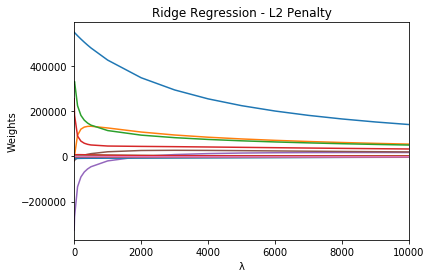

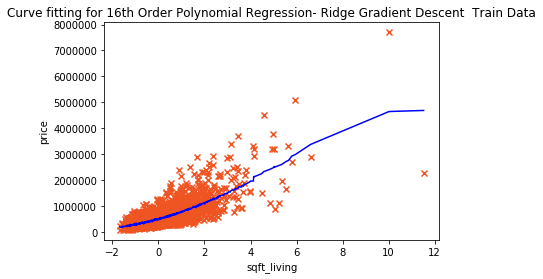

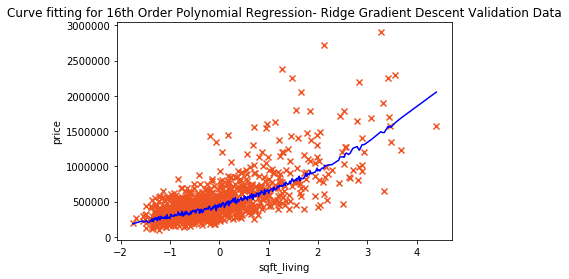

 Q.2-5 - 16th Order Ridge Polynomial Regression, Optimized Weights are -
 [[  5.35914088e+05   9.42482115e+04   2.25215112e+05   9.06249721e+04
   -1.34789774e+05  -4.74962442e+03   2.69239891e+03   1.98205811e+03
    2.00643565e+03  -6.94197594e+03  -8.80688519e+03   2.22820827e+03
    6.11459470e+03   8.02441144e+03  -2.93725591e+03  -2.24522392e+03
    3.38187159e+02]]
 Q.2-5 - 16th Order Ridge Polynomial Regression, Train RMSE is - 198725.59893455575
 Q.2-5 - 16th Order Ridge Polynomial Regression, Validation RMSE is - 209571.1057843039
 Q.2-5 - 16th Order Ridge Polynomial Regression, Test RMSE is - 225590.2893546947


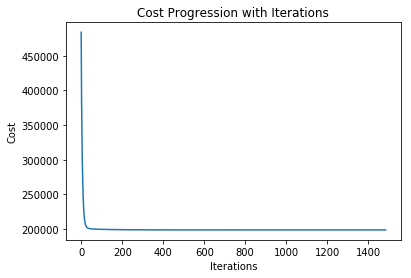

In [15]:
# Q.2-5 16th Order Ridge Polynomal Regression with Test, Train and Validation data

df = data2;
X_train, X_val, X_test, y_train, y_val, y_test = split_data_test_train_val(df[['sqft_living']], df[['price']])

def perform_Ridge_Polynomial_Regression_val(X_train, X_val, X_test, y_train, y_val, y_test, 
                                                 order, xheader, yheader):
    betas = []
    lamda = [10000, 9000, 8000, 7000, 6000, 5000, 4000, 3000, 2000, 1000, 500, 400, 300, 200, 100, 10, 1, 0.1]
    alpha = 0.1
    scores = pd.DataFrame(columns=['alpha','lamda','rmse_diff', 'weights'])
    i=0
    for l in lamda:       
        betaTrain, rmseTrain, costsTrain, x = performRidgePolynomialRegression(pd.concat([X_train, y_train], axis=1),
                                                            alpha, 10000, order, l, xheader, yheader, False, '')
        betas.append(np.asarray(betaTrain).ravel())
        betaVal, rmseVal, costsVal, x = performRidgePolynomialRegression(pd.concat([X_val, y_val], axis=1), 
                                                            alpha, 10000, order, l, xheader, yheader, False, '')
        if(l <=100 and l>=0.1):
            scores.loc[i] = pd.Series({'lamda':l, 'rmse_diff':abs(rmseTrain-rmseVal), 'weights' : betaTrain})
            i=i+1
    #print(scores)
    least_rmse_comb = scores['rmse_diff'].idxmin()
    lam = scores.iloc[[least_rmse_comb]]['lamda'][least_rmse_comb]
    plotWeightsWithL2Penalty(lamda, betas, 'Ridge Regression - L2 Penalty', 10000)
    betaTrain, rmseTrain, costsTrain, x1 = performRidgePolynomialRegression(pd.concat([X_train, y_train], axis=1),
                                                                alpha, 10000, order, lam, xheader, yheader, True, ' Train Data')
    betaVal, rmseVal, costsVal, x2 = performRidgePolynomialRegression(pd.concat([X_val, y_val], axis=1), 
                                                                alpha, 10000, order, lam, xheader, yheader, True, 'Validation Data')
    return betaTrain, rmseTrain, costsTrain, x1, lam, rmseVal


betaTrain, rmseTrain, costsTrain, Xtr, lam, rmseVal = perform_Ridge_Polynomial_Regression_val(X_train, X_val, X_test, y_train, y_val, y_test, 16,
                                                                                'sqft_living', 'price')

dfTest = pd.concat([X_test, y_test], axis=1)
dfTest = generatePolynomialInput(dfTest, 16, 'sqft_living')
X_test, y_test = normalizeData(dfTest, False ,'', 'price')
rmseTest = get_rmse_l2(np.matrix(X_test), np.matrix(y_test), betaTrain, lam)
print(" Q.2-5 - 16th Order Ridge Polynomial Regression, Optimized Weights are -\n", betaTrain.ravel())
print(" Q.2-5 - 16th Order Ridge Polynomial Regression, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
print(" Q.2-5 - 16th Order Ridge Polynomial Regression, " + colored('Validation RMSE is - ' + str(rmseVal), 'green'))
print(" Q.2-5 - 16th Order Ridge Polynomial Regression, " + colored('Test RMSE is - ' + str(rmseTest), 'green'))
plotCostHistory(costsTrain)

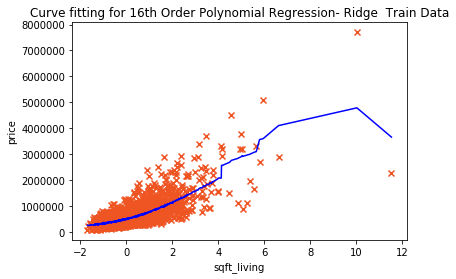

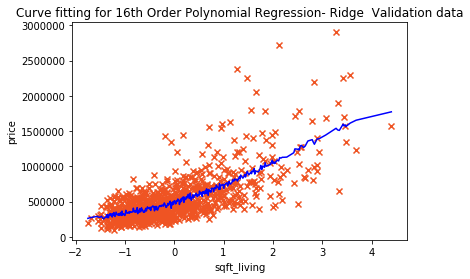

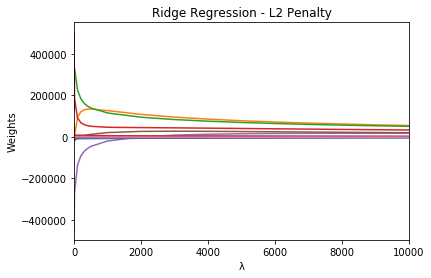

 Q.2-6 - 16th Order Ridge sklearn model, Optimized Weights are -
 [  0.00000000e+00   5.96389650e+04   1.29216117e+05   5.04024188e+05
  -4.48133521e+05  -1.72205658e+04   1.11218408e+03   2.93141934e+02
   3.11135070e+03  -6.09738140e+03  -1.04273364e+04  -8.02394764e+01
   5.44443298e+03   7.26661364e+03  -3.51797824e+03  -4.18895421e+03
  -3.24177625e+02]
 Q.2-6 - 16th Order Ridge sklearn model, Train RMSE is - 430356.3929300971
 Q.2-6 - 16th Order Ridge sklearn model, Validation RMSE is - 412363.7898784787
 Q.2-6 - 16th Order Ridge sklearn model, Test RMSE is - 427915.31939088297


In [16]:
# 2-6 16th Order Polynomial Regression scikit-learn Ridge model

df = data2;
X_train, X_val, X_test, y_train, y_val, y_test = split_data_test_train_val(df[['sqft_living']], df[['price']])

lamdas =  [10000, 9000, 8000, 7000, 6000, 5000, 4000, 3000, 2000, 1000, 500, 400, 300, 200, 100, 10, 1, 0.1 ]
betas = []
scores = pd.DataFrame(columns=['lamda','rmse_diff', 'weights'])
i=0
for l in lamdas:
    XTrain, YTrain, betaTrain, rmseTrain = sklearn_ridge_polynomial_regression(pd.concat([X_train, y_train], axis=1), 16, 'sqft_living', 'price', True, l, False, '')
    betas.append(betaTrain.ravel())
    XVal, YVal, betaVal, rmseVal = sklearn_ridge_polynomial_regression(pd.concat([X_val, y_val], axis=1), 16, 'sqft_living', 'price', True, l, False, '')
    if(l <=100 and l>=0.1):
        scores.loc[i] = pd.Series({'lamda':l, 'rmse_diff':abs(rmseTrain-rmseVal), 'weights' : betaTrain})
        i=i+1
least_rmse_comb = scores['rmse_diff'].idxmin()
#print(scores)
lam = scores.iloc[[least_rmse_comb]]['lamda'][least_rmse_comb]
#print(lam)
XTrain, YTrain, betaTrain, rmseTrain = sklearn_ridge_polynomial_regression(pd.concat([X_train, y_train], axis=1), 16, 'sqft_living', 'price', True, lam, True, ' Train Data')
XVal, YVal, betaVal, rmseVal = sklearn_ridge_polynomial_regression(pd.concat([X_val, y_val], axis=1), 16, 'sqft_living', 'price', True, lam, True, ' Validation data')
plotWeightsWithL2Penalty(lamdas,betas, 'Ridge Regression - L2 Penalty', 10000)
                                                                       
dfTest = pd.concat([X_test, y_test], axis=1)
dfTest = generatePolynomialInput(dfTest, 16, 'sqft_living')
X_test, y_test = normalizeData(dfTest, False ,'', 'price')
rmseTest = get_rmse_l2(np.matrix(X_test), np.matrix(y_test), betaTrain.T, lam)
print(" Q.2-6 - 16th Order Ridge sklearn model, Optimized Weights are -\n", betaTrain.ravel())
print(" Q.2-6 - 16th Order Ridge sklearn model, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
print(" Q.2-6 - 16th Order Ridge sklearn model, " + colored('Validation RMSE is - ' + str(rmseVal), 'green'))
print(" Q.2-6 - 16th Order Ridge sklearn model, " + colored('Test RMSE is - ' + str(rmseTest), 'green'))

/Users/meenakshiparyani/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


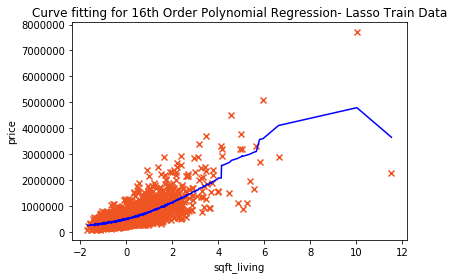

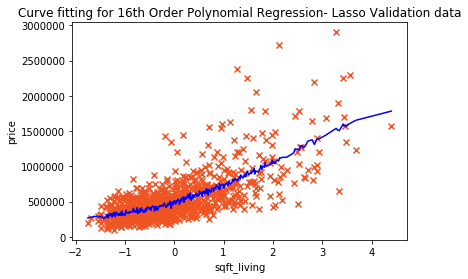

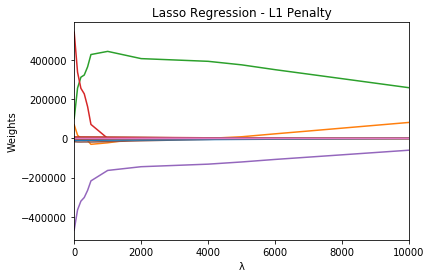

 Q.2-7 - 16th Order Ridge sklearn model, Optimized Weights are -
 [[  0.00000000e+00   6.40561058e+04   1.16351976e+05   5.20620938e+05
   -4.56341252e+05  -1.70601874e+04   1.12719181e+03   2.98134600e+02
    3.10231412e+03  -6.09517645e+03  -1.04126542e+04  -3.07450232e+01
    5.41358758e+03   7.26335289e+03  -3.50878517e+03  -4.16958383e+03
   -3.25952853e+02]]
 Q.2-7 - 16th Order Ridge sklearn model, Train RMSE is - 430348.12550404953
 Q.2-7 - 16th Order Ridge sklearn model, Validation RMSE is - 412359.323743965
 Q.2-7 - 16th Order Ridge sklearn model, Test RMSE is - 427950.5885154121


In [17]:
# 2-7 16th Order Polynomial Regression scikit-learn Lasso model

df = data2;
X_train, X_val, X_test, y_train, y_val, y_test = split_data_test_train_val(df[['sqft_living']], df[['price']])

lamdas = [10000, 9000, 8000, 7000, 6000, 5000, 4000, 3000, 2000, 1000, 500, 400, 300, 200, 100, 10, 1, 0.1 ]
betas = []
scores = pd.DataFrame(columns=['lamda','rmse_diff', 'weights'])
i=0
for l in lamdas:
    XTrain, YTrain, betaTrain, rmseTrain = sklearn_lasso_polynomial_regression(pd.concat([X_train, y_train], axis=1), 16, 'sqft_living', 'price', True, l, False, '')
    betas.append(np.asarray(betaTrain).ravel())
    XVal, YVal, betaVal, rmseVal = sklearn_lasso_polynomial_regression(pd.concat([X_val, y_val], axis=1), 16, 'sqft_living', 'price', True, l, False, '')
    if(l <=100):
        scores.loc[i] = pd.Series({'lamda':l, 'rmse_diff':abs(rmseTrain-rmseVal), 'weights' : betaTrain})
        i=i+1
least_rmse_comb = scores['rmse_diff'].idxmin()
lam = scores.iloc[[least_rmse_comb]]['lamda'][least_rmse_comb]
#print(lam)
#print(scores)
XTrain, YTrain, betaTrain, rmseTrain = sklearn_lasso_polynomial_regression(pd.concat([X_train, y_train], axis=1), 
                                                    16, 'sqft_living', 'price', True, lam, True, ' Train Data')
XVal, YVal, betaVal, rmseVal = sklearn_lasso_polynomial_regression(pd.concat([X_val, y_val], axis=1), 
                                                    16, 'sqft_living', 'price', True, lam, True, ' Validation data')
plotWeightsWithL2Penalty(lamdas, betas, 'Lasso Regression - L1 Penalty', 10000)
                                                                       
dfTest = pd.concat([X_test, y_test], axis=1)
dfTest = generatePolynomialInput(dfTest, 16, 'sqft_living')
X_test, y_test = normalizeData(dfTest, False ,'', 'price')
rmseTest = get_rmse_l1(np.matrix(X_test), np.matrix(y_test), betaTrain.T, lam)
print(" Q.2-7 - 16th Order Ridge sklearn model, Optimized Weights are -\n", betaTrain.ravel())
print(" Q.2-7 - 16th Order Ridge sklearn model, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
print(" Q.2-7 - 16th Order Ridge sklearn model, " + colored('Validation RMSE is - ' + str(rmseVal), 'green'))
print(" Q.2-7 - 16th Order Ridge sklearn model, " + colored('Test RMSE is - ' + str(rmseTest), 'green'))                                                                                                                    

In [18]:
# Reading data for Q.3
data3 = pd.read_csv('ex2data3.csv', sep=",", encoding='utf-8', header='infer')

# Prepare normalized data
data3 = data3.drop('Unnamed: 0',axis=1)
df = data3
dfX = df[df.columns[:8]]
dfY = df[df.columns[8:]]

# Split the data
X_train, X_val, X_test, y_train, y_val, y_test = split_data_test_train_val(dfX, dfY)

0.1


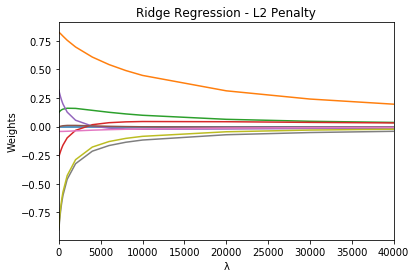

 Q.3-1 - Ridge sklearn model, Optimized Weights are -
 [ 0.          0.82523714  0.12336783 -0.26483098  0.31866552 -0.0027678
 -0.04163254 -0.90378544 -0.87916237]
 Q.3-1 - Ridge sklearn model, Train RMSE is - 1.5549196635981601
 Q.3-1 - Ridge sklearn model, Validation RMSE is - 1.5569548322378954
 Q.3-1 - Ridge sklearn model, Test RMSE is - 1.5258690315477348


In [19]:
# Q. 3-1 Multi Variate Ridge Regression SK learn - L2 Penalty
X_train, X_val, X_test, y_train, y_val, y_test = split_data_test_train_val(dfX, dfY)
lamdas = [40000, 30000, 20000,10000, 8000, 6000, 4000, 2000, 1000, 500, 400, 300, 200, 100, 10, 1, 0.1 ]
betas = []
scores = pd.DataFrame(columns=['lamda','rmse_diff', 'weights'])
i=0
for l in lamdas:
    XTrain, YTrain, betaTrain, rmseTrain = sklearn_ridge_polynomial_regression(pd.concat([X_train, y_train], axis=1), None, '', 'price', False, l, False, '')
    betas.append(np.array(betaTrain).ravel())
    XVal, YVal, betaVal, rmseVal = sklearn_ridge_polynomial_regression(pd.concat([X_val, y_val], axis=1), None, '', 'price', False, l, False, '')
    if(l <=100):
        scores.loc[i] = pd.Series({'lamda':l, 'rmse_diff':abs(rmseTrain-rmseVal), 'weights' : betaTrain})
        i=i+1
least_rmse_comb = scores['rmse_diff'].idxmin()
#print(scores)
lam = scores.iloc[[least_rmse_comb]]['lamda'][least_rmse_comb]
print(lam)
XTrain, YTrain, betaTrain, rmseTrain = sklearn_ridge_polynomial_regression(pd.concat([X_train, y_train], axis=1), None, '', 'price', False, lam, False, ' Train Data')
XVal, YVal, betaVal, rmseVal = sklearn_ridge_polynomial_regression(pd.concat([X_val, y_val], axis=1), None, '', 'price', False, lam, False, ' Validation data')
plotWeightsWithL2Penalty(lamdas, betas, 'Ridge Regression - L2 Penalty', 40000)
                                                                       
X_test, y_test = normalizeData(pd.concat([X_test, y_test], axis=1), False ,'', 'price')
rmseTest = get_rmse_l2(np.matrix(X_test), np.matrix(y_test), betaTrain.T, lam)
print(" Q.3-1 - Ridge sklearn model, Optimized Weights are -\n", betaTrain.ravel())
print(" Q.3-1 - Ridge sklearn model, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
print(" Q.3-1 - Ridge sklearn model, " + colored('Validation RMSE is - ' + str(rmseVal), 'green'))
print(" Q.3-1 - Ridge sklearn model, " + colored('Test RMSE is - ' + str(rmseTest), 'green'))

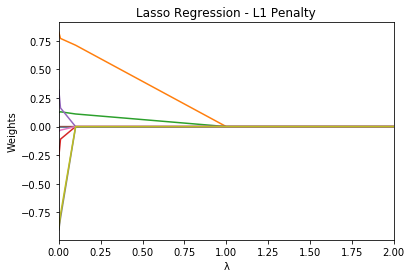

 Q.3-2 - Lasso sklearn model, Optimized Weights are -
 [[ 0.          0.77103901  0.12922587 -0.11025276  0.16290435 -0.
  -0.03114522 -0.800844   -0.76812218]]
 Q.3-2 - Lasso sklearn model, Train RMSE is - 1.5558542046704855
 Q.3-2 - Lasso sklearn model, Validation RMSE is - 1.5577414280953974
 Q.3-2 - Lasso sklearn model, Test RMSE is - 1.526054002854086


In [23]:
# Q. 3-2 Multi Variate Lasso Regression SK learn - L1 Penalty
X_train, X_val, X_test, y_train, y_val, y_test = split_data_test_train_val(dfX, dfY)
lamdas = [10000, 9000, 8000, 7000, 6000, 5000, 4000, 3000, 2000, 1000, 500, 400, 300, 200, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
betas = []
scores = pd.DataFrame(columns=['lamda','rmse_diff', 'weights'])
i=0
for l in lamdas:
    XTrain, YTrain, betaTrain, rmseTrain = sklearn_lasso_polynomial_regression(pd.concat([X_train, y_train], axis=1), None, '', 'price', False, l, False, '')
    betas.append(np.array(betaTrain).ravel())
    XVal, YVal, betaVal, rmseVal = sklearn_lasso_polynomial_regression(pd.concat([X_val, y_val], axis=1), None, '', 'price', False, l, False, '')
    if(l <1):
        scores.loc[i] = pd.Series({'lamda':l, 'rmse_diff':abs(rmseTrain-rmseVal), 'weights' : betaTrain})
        i=i+1
least_rmse_comb = scores['rmse_diff'].idxmin()
#print(scores)
lam = scores.iloc[[least_rmse_comb]]['lamda'][least_rmse_comb]
#print(lam)
XTrain, YTrain, betaTrain, rmseTrain = sklearn_lasso_polynomial_regression(pd.concat([X_train, y_train], axis=1), None, '', 'price', False, lam, False, ' Train Data')
XVal, YVal, betaVal, rmseVal = sklearn_lasso_polynomial_regression(pd.concat([X_val, y_val], axis=1), None, '', 'price', False, lam, False, ' Validation data')
plotWeightsWithL2Penalty(lamdas, betas, 'Lasso Regression - L1 Penalty', 2)

X_test, y_test = normalizeData(pd.concat([X_test, y_test], axis=1), False ,'', 'price')                                       
rmseTest = get_rmse_l1(np.matrix(X_test), np.matrix(y_test), betaTrain.T, lam)
print(" Q.3-2 - Lasso sklearn model, Optimized Weights are -\n", betaTrain.ravel())
print(" Q.3-2 - Lasso sklearn model, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
print(" Q.3-2 - Lasso sklearn model, " + colored('Validation RMSE is - ' + str(rmseVal), 'green'))
print(" Q.3-2 - Lasso sklearn model, " + colored('Test RMSE is - ' + str(rmseTest), 'green')) 

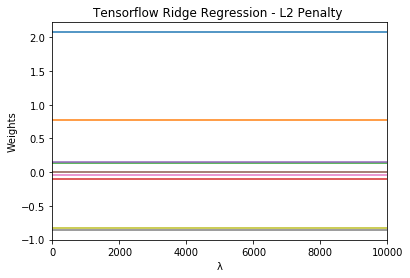

 Q.3-3 - Tensorflow Ridge model, Optimized Weights are -
 [ 2.06001711  0.76763612  0.14129874 -0.09356622  0.14839217  0.00403116
 -0.04119361 -0.80254722 -0.7684629 ]

Q.3-3 - Tensorflow Ridge model, Train RMSE is - 0.7306787525567349
 Q.3-3 - Tensorflow Ridge model, Validation RMSE is - 0.723026407653867
 Q.3-3 - Tensorflow Ridge model, Test RMSE is - 0.5788440454294085


In [25]:
# Q. 3-3 Multi Variate Ridge Regression using Tensorflow - L2 Penalty
X_train, X_val, X_test, y_train, y_val, y_test = split_data_test_train_val(dfX, dfY)


def reg_polynomial_regression_tensorflow(df, lamda, epochs, learning_rate, isLasso):
    scaler = StandardScaler()
    y = df[['price']]
    x = df.drop('price',axis=1)
    m, n = x.shape
    scaled_housing_data = scaler.fit_transform(x)
    scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]
    X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
    y = tf.constant(y.values.reshape(-1, 1), dtype=tf.float32, name="y")
    beta = tf.Variable(tf.random_uniform([n+1, 1], -1.0, 1.0, seed=42), name="beta")
    y_pred = tf.matmul(X, beta, name="Predictions")
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name= "mse")
    gradients = 2/m * tf.add(tf.matmul(tf.transpose(X), error), lamda*beta)
    training_op = tf.assign(beta, beta - learning_rate * gradients)
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        rmse_fin = 0
        for epoch in range(epochs):
            if epoch % 100 == 0:
                mse_fin = mse.eval()
                #print("Epoch ", epoch, "MSE =", mse_fin)
            sess.run(training_op)
        best_beta = beta.eval()
        #print(best_beta)
        return best_beta, math.sqrt(mse.eval())

lamdas = [10000, 8000, 6000, 4000, 2000, 1000, 500, 400, 300, 200, 100, 10, 1, 0.1 ]
betas = []
scores = pd.DataFrame(columns=['lamda','rmse_diff', 'weights'])
i=0
for l in lamdas:
    betaTrain, rmseTrain = reg_polynomial_regression_tensorflow(pd.concat([X_train, y_train] ,axis=1), 10, 100, 0.1, False)
    #print(betaTrain)
    betas.append(np.array(betaTrain).ravel())
    betaVal, rmseVal = reg_polynomial_regression_tensorflow(pd.concat([X_val, y_val] ,axis=1), 10, 100, 0.1, False)
    if(l <=100):
        scores.loc[i] = pd.Series({'lamda':l, 'rmse_diff':abs(rmseTrain-rmseVal), 'weights' : betaTrain})
        i=i+1
#print(scores)
least_rmse_comb = scores['rmse_diff'].idxmin()
lam = scores.iloc[[least_rmse_comb]]['lamda'][least_rmse_comb]
#print(lam)
betaTrain, rmseTrain = reg_polynomial_regression_tensorflow(pd.concat([X_train, y_train] ,axis=1), lam, 100, 0.1, False)
betaVal, rmseVal = reg_polynomial_regression_tensorflow(pd.concat([X_val, y_val] ,axis=1), lam, 100, 0.1, False)
plotWeightsWithL2Penalty(lamdas, betas, 'Tensorflow Ridge Regression - L2 Penalty ', 10000)
       
X_test, y_test = normalizeData(pd.concat([X_test, y_test], axis=1), False ,'', 'price')
rmseTest = get_rmse_l2(np.matrix(X_test), np.matrix(y_test), betaTrain, lam)
print(" Q.3-3 - Tensorflow Ridge model, Optimized Weights are -\n", betaTrain.ravel())
print("\nQ.3-3 - Tensorflow Ridge model, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
print(" Q.3-3 - Tensorflow Ridge model, " + colored('Validation RMSE is - ' + str(rmseVal), 'green'))
print(" Q.3-3 - Tensorflow Ridge model, " + colored('Test RMSE is - ' + str(rmseTest), 'green'))

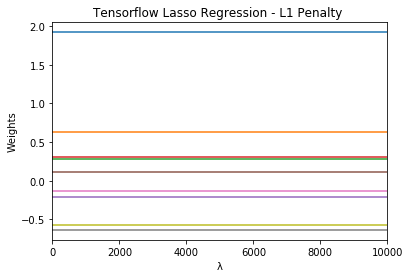

 Q.3-4 - Tensorflow Lasso model, Optimized Weights are -
 [ 1.90912855  0.62541932  0.27398744  0.30868798 -0.20815112  0.10604209
 -0.12608035 -0.62936872 -0.5654878 ]

Q.3-4 - Tensorflow Lasso model, Train RMSE is - 0.7965313787655156
 Q.3-4 - Tensorflow Lasso model, Validation RMSE is - 0.8048472940244353
 Q.3-4 - Tensorflow Lasso model, Test RMSE is - 0.5668344186091657


In [24]:
# Q. 3-4 Multi Variate Lasso Regression using Tensorflow - L1 Penalty
X_train, X_val, X_test, y_train, y_val, y_test = split_data_test_train_val(dfX, dfY)

lamdas = [10000, 8000, 6000, 4000, 2000, 1000, 500, 400, 300, 200, 100, 10, 1, 0.1 ]
betas = []
scores = pd.DataFrame(columns=['lamda','rmse_diff', 'weights'])
i=0
for l in lamdas:
    betaTrain, rmseTrain = reg_polynomial_regression_tensorflow(pd.concat([X_train, y_train] ,axis=1), 10, 100, 0.01, True)
    betas.append(np.array(betaTrain.ravel())) 
    betaVal, rmseVal = reg_polynomial_regression_tensorflow(pd.concat([X_val, y_val] ,axis=1), 10, 100, 0.01, True)
    if(l <=100):
        scores.loc[i] = pd.Series({'lamda':l, 'rmse_diff':abs(rmseTrain-rmseVal), 'weights' : betaTrain})
        i=i+1
least_rmse_comb = scores['rmse_diff'].idxmin()
#print(scores)
lam = scores.iloc[[least_rmse_comb]]['lamda'][least_rmse_comb]
#print(lam)
betaTrain, rmseTrain = reg_polynomial_regression_tensorflow(pd.concat([X_train, y_train] ,axis=1), lam, 100, 0.01, True)
betaVal, rmseVal = reg_polynomial_regression_tensorflow(pd.concat([X_val, y_val] ,axis=1), lam, 100, 0.01, True)
plotWeightsWithL2Penalty(lamdas, betas, 'Tensorflow Lasso Regression - L1 Penalty ', 10000)
       
X_test, y_test = normalizeData(pd.concat([X_test, y_test], axis=1), False ,'', 'price')
rmseTest = get_rmse_l1(np.matrix(X_test), np.matrix(y_test), betaTrain, lam)
print(" Q.3-4 - Tensorflow Lasso model, Optimized Weights are -\n", betaTrain.ravel())
print("\nQ.3-4 - Tensorflow Lasso model, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
print(" Q.3-4 - Tensorflow Lasso model, " + colored('Validation RMSE is - ' + str(rmseVal), 'green'))
print(" Q.3-4 - Tensorflow Lasso model, " + colored('Test RMSE is - ' + str(rmseTest), 'green'))